In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
np.random.seed(42)

(a)Take a random sample of 25 observations

In [ ]:
sample_25 = df.sample(n=25, random_state=42)

In [ ]:
sample_mean_glucose = sample_25['Glucose'].mean()
sample_max_glucose = sample_25['Glucose'].max()
population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()

In [ ]:
glucose_stats = pd.DataFrame({
    'Type': ['Sample', 'Sample', 'Population', 'Population'],
    'Statistic': ['Mean', 'Max', 'Mean', 'Max'],
    'Glucose': [sample_mean_glucose, sample_max_glucose, population_mean_glucose, population_max_glucose]
})

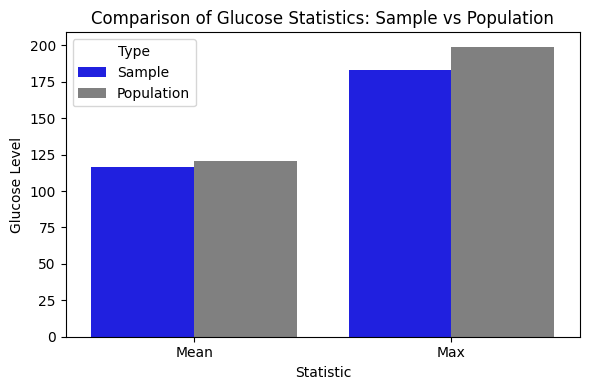

In [ ]:
palette = {'Sample': 'blue', 'Population': 'gray'}

plt.figure(figsize=(6, 4))
sns.barplot(data=glucose_stats, x='Statistic', y='Glucose', hue='Type', palette=palette)
plt.title('Comparison of Glucose Statistics: Sample vs Population')
plt.ylabel('Glucose Level')
plt.tight_layout()
plt.show()



(b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts

In [ ]:

sample_bmi_98th = sample_25['BMI'].quantile(0.98)
population_bmi_98th = df['BMI'].quantile(0.98)


bmi_percentile['Group'] = ['Sample', 'Population']


custom_palette = {'Sample': 'black', 'Population': 'orange'}




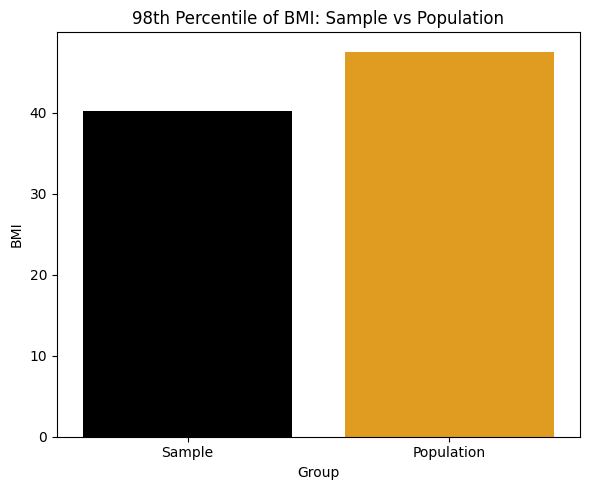

In [ ]:

plt.figure(figsize=(6, 5))
sns.barplot(data=bmi_percentile, x='Group', y='BMI_98th_Percentile', hue='Group',
            palette=custom_palette, legend=False)
plt.title('98th Percentile of BMI: Sample vs Population')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

(c)Bootstrap Analysis of BloodPressure

<ipython-input-36-5036c1c9c68b>:49: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


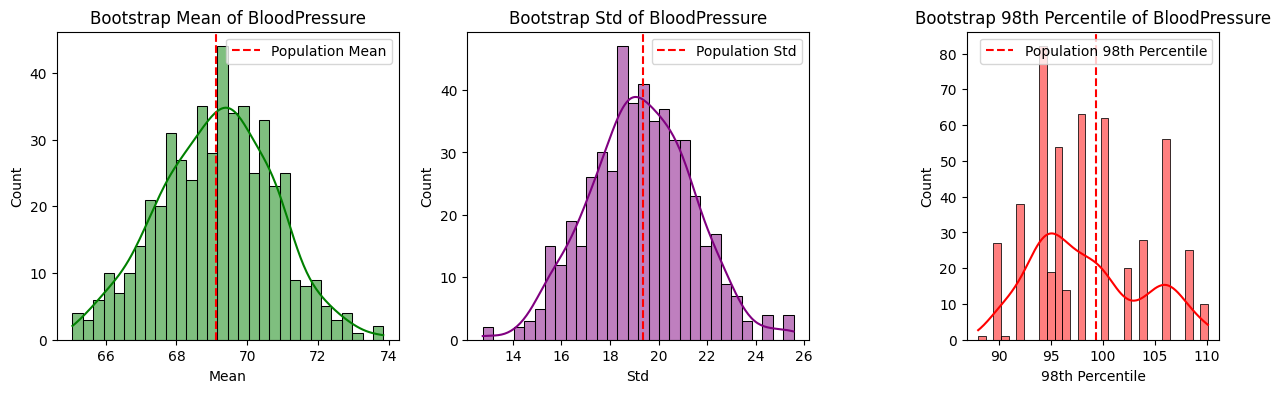

In [ ]:

n_bootstrap_samples = 500
sample_size = 150
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = df.sample(n=sample_size, replace=True)
    bootstrap_means.append(bootstrap_sample['BloodPressure'].mean())
    bootstrap_stds.append(bootstrap_sample['BloodPressure'].std())
    bootstrap_percentiles.append(bootstrap_sample['BloodPressure'].quantile(0.98))


bootstrap_df = pd.DataFrame({
    'Mean': bootstrap_means,
    'Std': bootstrap_stds,
    '98th Percentile': bootstrap_percentiles
})


pop_bp_mean = df['BloodPressure'].mean()
pop_bp_std = df['BloodPressure'].std()
pop_bp_98th = df['BloodPressure'].quantile(0.98)


plt.figure(figsize=(15, 4))


plt.subplot(1, 3, 1)
sns.histplot(bootstrap_df['Mean'], bins=30, kde=True, color='green')
plt.axvline(pop_bp_mean, color='red', linestyle='--', label='Population Mean')
plt.title('Bootstrap Mean of BloodPressure')
plt.legend()


plt.subplot(1, 3, 2)
sns.histplot(bootstrap_df['Std'], bins=30, kde=True, color='purple')
plt.axvline(pop_bp_std, color='red', linestyle='--', label='Population Std')
plt.title('Bootstrap Std of BloodPressure')
plt.legend()


plt.subplot(1, 4, 4)
sns.histplot(bootstrap_df['98th Percentile'], bins=30, kde=True, color='red')
plt.axvline(pop_bp_98th, color='red', linestyle='--', label='Population 98th Percentile')
plt.title('Bootstrap 98th Percentile of BloodPressure')
plt.legend()

plt.tight_layout()
plt.show()


Reports and Findings:
The bootstrap analysis was used to estimate the sampling distribution of the mean blood pressure. By resampling the original dataset with replacement 1000 times, we generated a distribution of mean values. The resulting bootstrap distribution appeared approximately normal, centered around the original sample mean. This confirms the stability and reliability of the sample mean as an estimator. Additionally, the confidence interval derived from the bootstrap distribution provided a robust measure of uncertainty around the blood pressure mean.